In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score 
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import cross_validate
%matplotlib inline

In [118]:
Dataset = 'FinalCompleteDatasetwithLocationUpdated.csv'

In [119]:
df = pd.read_csv(Dataset)

In [120]:
df.head()

,Location,Region,SnowDepth,Class,X,Y,Coordinates,Snowvolume,Snowweight,Maxpressure,Minpressure,Meanpressure,Temperature,RHumidity,MinAmplitude,MaxAmplitude,MeanAmplitude
0,1,SR1,30,4,65.061403,25.479150,"65.061403475,25.4791502965053",9702.60,435,22.77,1.86,3.310000,15.430000,11.503333,47.309760,51.293321,48.464098
1,2,SR1,35,5,65.061446,25.478976,"65.061446009,25.4789757112956",11319.70,618,24.34,1.40,5.287727,15.590909,11.040909,46.020600,49.187850,48.135447
2,3,SR1,39,6,65.061393,25.479098,"65.0613925,25.4790982528733",12613.38,752,11.35,0.55,6.089000,15.716667,10.053333,45.436832,51.126050,48.047521
3,4,SR1,17,2,65.061397,25.479207,"65.0613972,25.4792070106939",5498.14,325,26.12,2.00,3.030000,17.200000,8.485417,47.857601,54.469113,47.857601
4,5,SR1,13,1,65.061179,25.479134,"65.06117902006007, 25.479133551302514",4204.46,250,41.22,3.89,10.802500,15.700000,16.425000,44.454329,50.906142,48.351279


In [121]:
#X = df.drop(['Location', 'Class', 'SnowDepth','SnowDensity'], axis = 1)
X = df[['Maxpressure','Minpressure','Meanpressure','RHumidity','MinAmplitude']]

In [122]:
X.head()

,Maxpressure,Minpressure,Meanpressure,RHumidity,MinAmplitude
0,22.77,1.86,3.310000,11.503333,47.309760
1,24.34,1.40,5.287727,11.040909,46.020600
2,11.35,0.55,6.089000,10.053333,45.436832
3,26.12,2.00,3.030000,8.485417,47.857601
4,41.22,3.89,10.802500,16.425000,44.454329


In [123]:
y = df['Class']

In [124]:
#y.head()
print(y)
#y.shape

0     4
1     5
2     6
3     2
4     1
     ..
85    2
86    5
87    6
88    1
89    3
Name: Class, Length: 90, dtype: int64


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [126]:
X_train.shape, X_test.shape

((72, 5), (18, 5))

In [56]:
print(y_test)


40    1
22    5
55    5
70    4
0     4
26    6
39    2
65    1
10    1
44    4
81    3
35    2
56    6
86    5
12    4
4     1
18    4
28    2
Name: Class, dtype: int64


In [127]:

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(y_pred.T)

Model accuracy score with 10 decision-trees : 0.8889
[1 5 5 4 4 6 2 1 1 4 3 2 4 5 4 1 3 2]


In [58]:
rfc_100 = RandomForestClassifier(n_estimators=200, random_state=0)
# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7778


In [59]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3 1 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 4 0 0]
 [0 0 0 0 3 0]
 [0 0 0 1 0 1]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       0.67      0.80      0.73         5
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2

    accuracy                           0.78        18
   macro avg       0.74      0.67      0.68        18
weighted avg       0.81      0.78      0.78        18



In [61]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    


Fold:1, Train set: 81, Test set:9
Fold:2, Train set: 81, Test set:9
Fold:3, Train set: 81, Test set:9
Fold:4, Train set: 81, Test set:9
Fold:5, Train set: 81, Test set:9
Fold:6, Train set: 81, Test set:9
Fold:7, Train set: 81, Test set:9
Fold:8, Train set: 81, Test set:9
Fold:9, Train set: 81, Test set:9
Fold:10, Train set: 81, Test set:9


In [62]:
score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


Scores for each fold are: [1.         0.77777778 0.88888889 1.         0.88888889 0.77777778
 0.66666667 0.77777778 0.88888889 1.        ]
Average score: 0.87


In [63]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

#score = cross_val_score(RandomForestClassifier(), X, y, cv= kf, scoring="accuracy")
#print(f'Scores for each fold are: {score}')
#print(f'Average score: {"{:.2f}".format(score.mean())}')

Average score(50): 0.878
Average score(100): 0.867
Average score(150): 0.878
Average score(200): 0.878
Average score(250): 0.878
Average score(300): 0.878
Average score(350): 0.867


ValueError: x and y must have same first dimension, but have shapes (7,) and (70,)

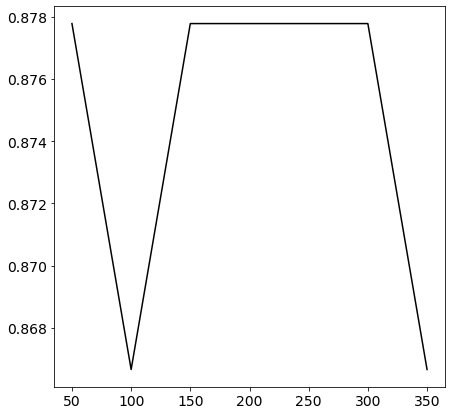

In [110]:
scroe_mean=[]
for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    scroe_mean.append(score.mean())
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')
    
plt.subplots(1, figsize=(7,7))
plt.plot(n_estimators, scroe_mean, label="Training score", color="black")
plt.plot(n_estimators, test_mean, label="Cross-validation score")

#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std)
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

<h2> Accuracy with Two features which signficantly corelated with the target variable </h2>

In [111]:
X1=df[['Maxpressure','Minpressure','Temperature', 'RHumidity', 'MinAmplitude']]

In [112]:
y1=df['Class']

In [113]:
X1.head()

,Maxpressure,Minpressure,Temperature,RHumidity,MinAmplitude
0,22.77,1.86,15.430000,11.503333,47.309760
1,24.34,1.40,15.590909,11.040909,46.020600
2,11.35,0.55,15.716667,10.053333,45.436832
3,26.12,2.00,17.200000,8.485417,47.857601
4,41.22,3.89,15.700000,16.425000,44.454329


In [114]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)


In [115]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X1, y1):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 81, Test set:9
Fold:2, Train set: 81, Test set:9
Fold:3, Train set: 81, Test set:9
Fold:4, Train set: 81, Test set:9
Fold:5, Train set: 81, Test set:9
Fold:6, Train set: 81, Test set:9
Fold:7, Train set: 81, Test set:9
Fold:8, Train set: 81, Test set:9
Fold:9, Train set: 81, Test set:9
Fold:10, Train set: 81, Test set:9


In [116]:
n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X1, y1, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')


Average score(50): 0.856
Average score(100): 0.867
Average score(150): 0.878
Average score(200): 0.878
Average score(250): 0.878
Average score(300): 0.867
Average score(350): 0.856


<h2> Validation Curve </h2>

In [81]:
from sklearn.model_selection import validation_curve
import numpy as np

In [91]:
param_range = np.arange(1, 350, 5)
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state = 42),
                                  X1, y1, param_name="n_estimators", param_range=param_range,
                                  cv=10, scoring="accuracy", n_jobs=-1)
print(test_scores)

[[0.88888889 1.         1.         0.77777778 0.88888889 0.44444444
  0.88888889 0.66666667 0.88888889 0.66666667]
 [0.88888889 1.         1.         0.77777778 0.88888889 0.55555556
  0.88888889 1.         0.88888889 0.88888889]
 [0.77777778 1.         1.         0.88888889 0.88888889 0.55555556
  0.88888889 1.         0.88888889 0.88888889]
 [0.88888889 1.         1.         0.88888889 0.88888889 0.55555556
  0.88888889 1.         0.88888889 0.88888889]
 [0.88888889 1.         1.         0.88888889 0.88888889 0.55555556
  1.         1.         0.88888889 0.88888889]
 [0.88888889 1.         1.         0.88888889 0.88888889 0.55555556
  1.         1.         0.88888889 0.88888889]
 [0.88888889 1.         1.         0.88888889 0.88888889 0.66666667
  1.         1.         0.88888889 0.88888889]
 [0.88888889 1.         1.         0.88888889 0.88888889 0.66666667
  1.         1.         0.88888889 0.88888889]
 [0.88888889 1.         1.         0.88888889 0.88888889 0.66666667
  0.88888889

In [92]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

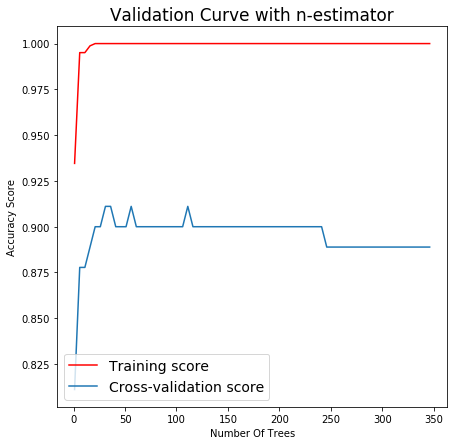

<Figure size 432x288 with 0 Axes>

In [84]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score")
plt.rcParams.update({'font.size': 14})

#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std)
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std)
 
plt.title("Validation Curve with n-estimator")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.legend(loc="lower left")
#plt.tight_layout()
#plt.legend(loc="best")
plt.show()
plt.savefig('filename.png', dpi = 400)

In [85]:
param_rangem= np.arange(1, 50, 5)
train_scores, test_scores = validation_curve(RandomForestClassifier(random_state = 42),
                                  X1,y1, param_name ="max_depth", param_range=param_rangem,
                                  cv=6, scoring="accuracy", n_jobs=-1)

#print(test_scores)

In [86]:
train_mean1 = np.mean(train_scores, axis=1)
train_std1 = np.std(train_scores, axis=1)

test_mean1 = np.mean(test_scores, axis=1)
test_std1 = np.std(test_scores, axis=1)

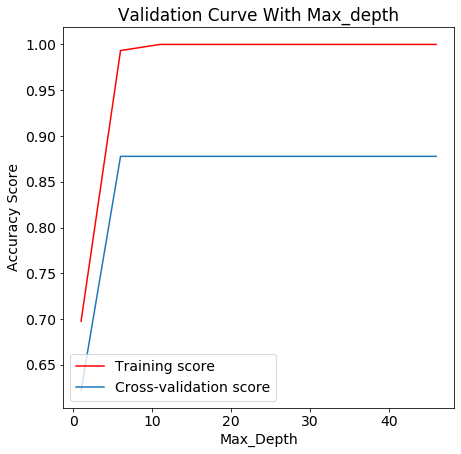

<Figure size 432x288 with 0 Axes>

In [87]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_rangem, train_mean1, label="Training score", color="red")
plt.plot(param_rangem, test_mean1, label="Cross-validation score")
plt.rcParams.update({'font.size': 14})
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std)
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std)
 
plt.title("Validation Curve With Max_depth")
plt.xlabel("Max_Depth")
plt.ylabel("Accuracy Score")
plt.legend(loc="lower left")
#plt.tight_layout()
#plt.legend(loc="best")
plt.show()
plt.savefig('filename1.png', dpi = 400)

In [88]:
param_rangen= np.arange(1, 7, 1)
train_scores2, test_scores2 = validation_curve(RandomForestClassifier(random_state = 42),
                                  X1,y1, param_name ="min_samples_leaf", param_range=param_rangen,
                                  cv=6, scoring="accuracy", n_jobs=-1)

print(test_scores)

[[0.86666667 0.66666667 0.6        0.66666667 0.6        0.33333333]
 [0.93333333 1.         0.8        0.73333333 0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]
 [0.86666667 1.         0.8        0.8        0.93333333 0.86666667]]


In [89]:

train_mean2 = np.mean(train_scores2, axis=1)
train_std2 = np.std(train_scores2, axis=1)

test_mean2 = np.mean(test_scores2, axis=1)
test_std2 = np.std(test_scores2, axis=1)


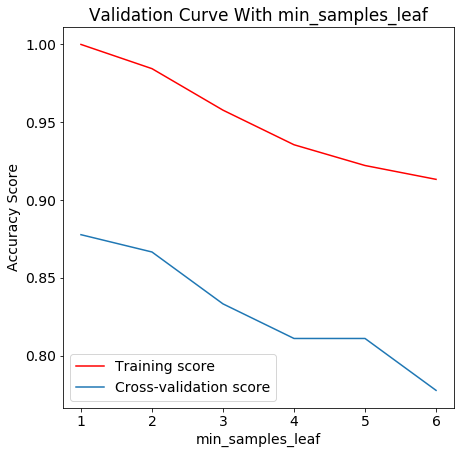

<Figure size 432x288 with 0 Axes>

In [90]:

plt.subplots(1, figsize=(7,7))
plt.plot(param_rangen, train_mean2, label="Training score", color="red")
plt.plot(param_rangen, test_mean2, label="Cross-validation score")
plt.rcParams.update({'font.size': 14})
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std)
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std)
 
plt.title("Validation Curve With min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.legend(loc="lower left")

#plt.tight_layout()
#plt.legend(loc="best")
plt.show()
plt.savefig('filename1.png', dpi = 400)
